In [2]:
import os
import re

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Specify the path to the folder containing the data (relative)
path = os.path.join("..", "data")

# Reading reviews
# fpath = os.path.join(path, "reviews.csv")
# reviews = pd.read_csv(fpath)

# Reading stress
fpath = os.path.join(path, "extracted", "stress_per_company.csv")
stress = pd.read_csv(fpath)

# Reading crunchbase data
fpath = os.path.join(path, "crawler", "all_company_data.csv")
companies = pd.read_csv(fpath)

# Reading coords
col_names = ["location", "lat", "lon", "count"]

fpath = os.path.join(path, "extracted", "locations_coordinates.csv")
coords = pd.read_csv(fpath, header=None, names=col_names)

In [4]:
# Define quadrant names
quadrants = {
    "Q1": "Positive Stress",  # Top-right quadrant
    "Q2": "Negative Stress",  # Top-left quadrant
    "Q3": "Passive",       # Bottom-left quadrant
    "Q4": "Low Stress"      # Bottom-right quadrant
}

In [5]:
stress.head().T

,0,1,2,3,4
company_name,IHG Hotels and Resorts,FCA Fiat Chrysler Automobiles,Penn State,NetApp,Mercer
company_id,4232,149,2931,5406,35818
average_rating_before,3.735821,3.321379,4.064619,3.598404,3.218702
zrating_before,0.429427,-0.436999,1.116808,0.142146,-0.651655
stress_before,0.003483,0.006897,0.002648,0.006383,0.005344
zstress_before,-0.735723,-0.394245,-0.819171,-0.445615,-0.549586
association_before,0.250651,0.184328,0.420452,0.129273,0.264219
quadrant_before,Q4,Q3,Q4,Q4,Q3
average_rating_during,3.951111,3.539811,NaN,4.050328,3.723658
zrating_during,0.391669,-0.61607,NaN,0.634765,-0.165621


In [6]:
temp = stress.dropna()

### 1. Stability Analysis

In [7]:
def analyze_stability(df):
    # Stability from 'before' to 'during'
    stability_before_to_during = df[df["quadrant_before"] == df["quadrant_during"]].shape[0]
    print(f"{stability_before_to_during} companies remained in the same quadrant from BEFORE and DURING the pandemic.")

    # Stability from 'during' to 'after'
    stability_during_to_after = df[df["quadrant_during"] == df["quadrant_after"]].shape[0]
    print(f"{stability_during_to_after} companies remained in the same quadrant from DURING and AFTER the pandemic.")

    # Stability throughout
    stability_throughout = df[(df["quadrant_before"] == df["quadrant_during"]) & (df["quadrant_during"] == df["quadrant_after"])].shape[0]
    print(f"{stability_throughout} companies remained in the same quadrant throughout the pandemic.")

In [8]:
def analyze_stability_per_quadrant(df):
    for i in range(1, 5):  # Assuming quadrants are labeled as Q1, Q2, Q3, Q4
        label = f"Q{i}"
        # Stability from 'before' to 'during'
        stability_before_to_during = df[
            (df["quadrant_before"] == label) &
            (df["quadrant_during"] == label)
        ].shape[0]
        print(f"In quadrant '{quadrants[label]}', {stability_before_to_during} companies remained stable from BEFORE and DURING the pandemic.")
        
        # Stability from 'during' to 'after'
        stability_during_to_after = df[
            (df["quadrant_during"] == label) &
            (df["quadrant_after"] == label)
        ].shape[0]
        print(f"In quadrant '{quadrants[label]}', {stability_during_to_after} companies remained stable from DURING and AFTER the pandemic.")
        
        # Stability throughout
        stability_throughout = df[
            (df["quadrant_before"] == label) &
            (df["quadrant_during"] == label) &
            (df["quadrant_after"] == label)
        ].shape[0]
        print(f"In quadrant '{quadrants[label]}', {stability_throughout} companies remained stable throughout the pandemic.\n")

In [9]:
analyze_stability(temp)

1135 companies remained in the same quadrant from BEFORE and DURING the pandemic.
1226 companies remained in the same quadrant from DURING and AFTER the pandemic.
867 companies remained in the same quadrant throughout the pandemic.


In [10]:
analyze_stability_per_quadrant(temp)

In quadrant 'Positive Stress', 48 companies remained stable from BEFORE and DURING the pandemic.
In quadrant 'Positive Stress', 40 companies remained stable from DURING and AFTER the pandemic.
In quadrant 'Positive Stress', 24 companies remained stable throughout the pandemic.

In quadrant 'Negative Stress', 103 companies remained stable from BEFORE and DURING the pandemic.
In quadrant 'Negative Stress', 106 companies remained stable from DURING and AFTER the pandemic.
In quadrant 'Negative Stress', 58 companies remained stable throughout the pandemic.

In quadrant 'Passive', 564 companies remained stable from BEFORE and DURING the pandemic.
In quadrant 'Passive', 613 companies remained stable from DURING and AFTER the pandemic.
In quadrant 'Passive', 453 companies remained stable throughout the pandemic.

In quadrant 'Low Stress', 420 companies remained stable from BEFORE and DURING the pandemic.
In quadrant 'Low Stress', 467 companies remained stable from DURING and AFTER the pandemi

### 2. Transition Frequency

In [11]:
def transition_frequency(df):
    transitions_summary = {f'Q{i}': {'in': 0, 'out': 0} for i in range(1, 5)}
    periods = [("quadrant_before", "quadrant_during"), ("quadrant_during", "quadrant_after")]


    print(f"Transition frequencies between quadrants:")

    for period in periods:
        start, end = period

        for i in range(1, 5):
            for j in range(1, 5):
                if i == j: continue
                
                transition_label = "'" + quadrants[f"Q{i}"] + "' to '" + quadrants[f"Q{j}"] + "'"
                transition_count = df[(df[start] == f"Q{i}") & (df[end] == f"Q{j}")].shape[0]
                print(f"{transition_label}: {transition_count} companies")

                # Update summary counts
                transitions_summary[f'Q{i}']['out'] += transition_count
                transitions_summary[f'Q{j}']['in'] += transition_count


    print(f"\nTransition summary:")
    for quadrant, counts in transitions_summary.items():
        print(f"{quadrants[quadrant]} had {counts['out']} transitions out and {counts['in']} transitions in.")

In [12]:
transition_frequency(temp)

Transition frequencies between quadrants:
'Positive Stress' to 'Negative Stress': 23 companies
'Positive Stress' to 'Passive': 23 companies
'Positive Stress' to 'Low Stress': 49 companies
'Negative Stress' to 'Positive Stress': 20 companies
'Negative Stress' to 'Passive': 119 companies
'Negative Stress' to 'Low Stress': 43 companies
'Passive' to 'Positive Stress': 12 companies
'Passive' to 'Negative Stress': 83 companies
'Passive' to 'Low Stress': 164 companies
'Low Stress' to 'Positive Stress': 31 companies
'Low Stress' to 'Negative Stress': 17 companies
'Low Stress' to 'Passive': 92 companies
'Positive Stress' to 'Negative Stress': 29 companies
'Positive Stress' to 'Passive': 16 companies
'Positive Stress' to 'Low Stress': 26 companies
'Negative Stress' to 'Positive Stress': 15 companies
'Negative Stress' to 'Passive': 92 companies
'Negative Stress' to 'Low Stress': 13 companies
'Passive' to 'Positive Stress': 13 companies
'Passive' to 'Negative Stress': 77 companies
'Passive' to 'Lo

### 3. Reversion Analysis

In [13]:
def reversion_analysis(df):
    # Identify reversion cases
    reversion_cases = df[(df["quadrant_before"] != df["quadrant_during"]) & (df["quadrant_before"] == df["quadrant_after"])]

    # Count reversion cases per quadrant
    reversion_counts = reversion_cases["quadrant_before"].value_counts()

    # Print results
    total_reversion_cases = len(reversion_cases)
    print(f"{total_reversion_cases} companies reverted back to their original quadrant after transitioning during the pandemic.\n")

    for label, count in reversion_counts.items():
        print(f"In quadrant '{quadrants[label]}', {count} companies reverted back to their original quadrant.")

In [14]:
reversion_analysis(temp)

191 companies reverted back to their original quadrant after transitioning during the pandemic.

In quadrant 'Passive', 102 companies reverted back to their original quadrant.
In quadrant 'Negative Stress', 38 companies reverted back to their original quadrant.
In quadrant 'Low Stress', 31 companies reverted back to their original quadrant.
In quadrant 'Positive Stress', 20 companies reverted back to their original quadrant.


### 4. Plots

In [15]:
stress["quadrant_before"] = stress["quadrant_before"].replace(quadrants)
stress["quadrant_during"] = stress["quadrant_during"].replace(quadrants)
stress["quadrant_after"] = stress["quadrant_after"].replace(quadrants)

In [16]:
def data_labels(labels, values, ax):
    for label, value in zip(labels, values):
        ax.text(
            x=label, 
            y=value, 
            s=round(value, 3), 
            ha="center",
            va="bottom"
        )

#### 4.1. Average Stress Levels

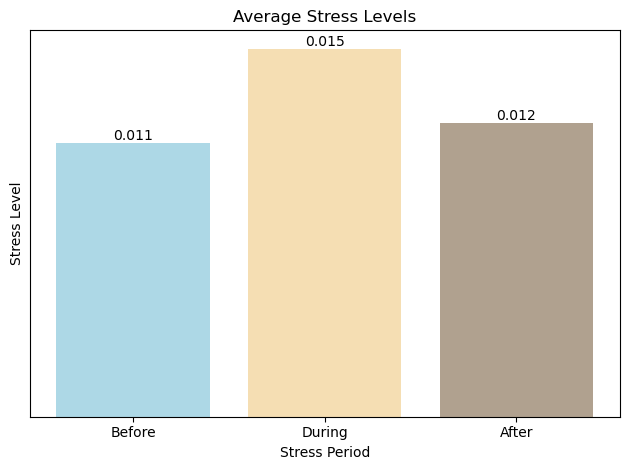

In [17]:
# Average stress score per cut-off point
avg_stress = stress[["stress_before", "stress_during", "stress_after"]].mean()

# Plot the results
labels = ["Before", "During", "After"]
values = avg_stress.values
colors = ["#add8e6", "#f5deb3", "#b0a18f"]

fig, ax = plt.subplots(1, 1)

plt.bar(labels, values, color=colors)
plt.title("Average Stress Levels")
plt.xlabel("Stress Period")
plt.ylabel("Stress Level")

data_labels(labels, values, ax)
plt.yticks([])

plt.tight_layout()
plt.show()

#### 4.2. Distribution of Companies per Quadrant

In [18]:
before_counts = stress["quadrant_before"].value_counts()
during_counts = stress["quadrant_during"].value_counts()
after_counts = stress["quadrant_after"].value_counts()

In [19]:
df_counts = pd.DataFrame({
    "before": before_counts,
    "during": during_counts,
    "after": after_counts
})

df_counts.head()

,before,during,after
Passive,2061,1178,1538
Low Stress,1339,1038,1273
Negative Stress,1191,707,927
Positive Stress,657,436,524


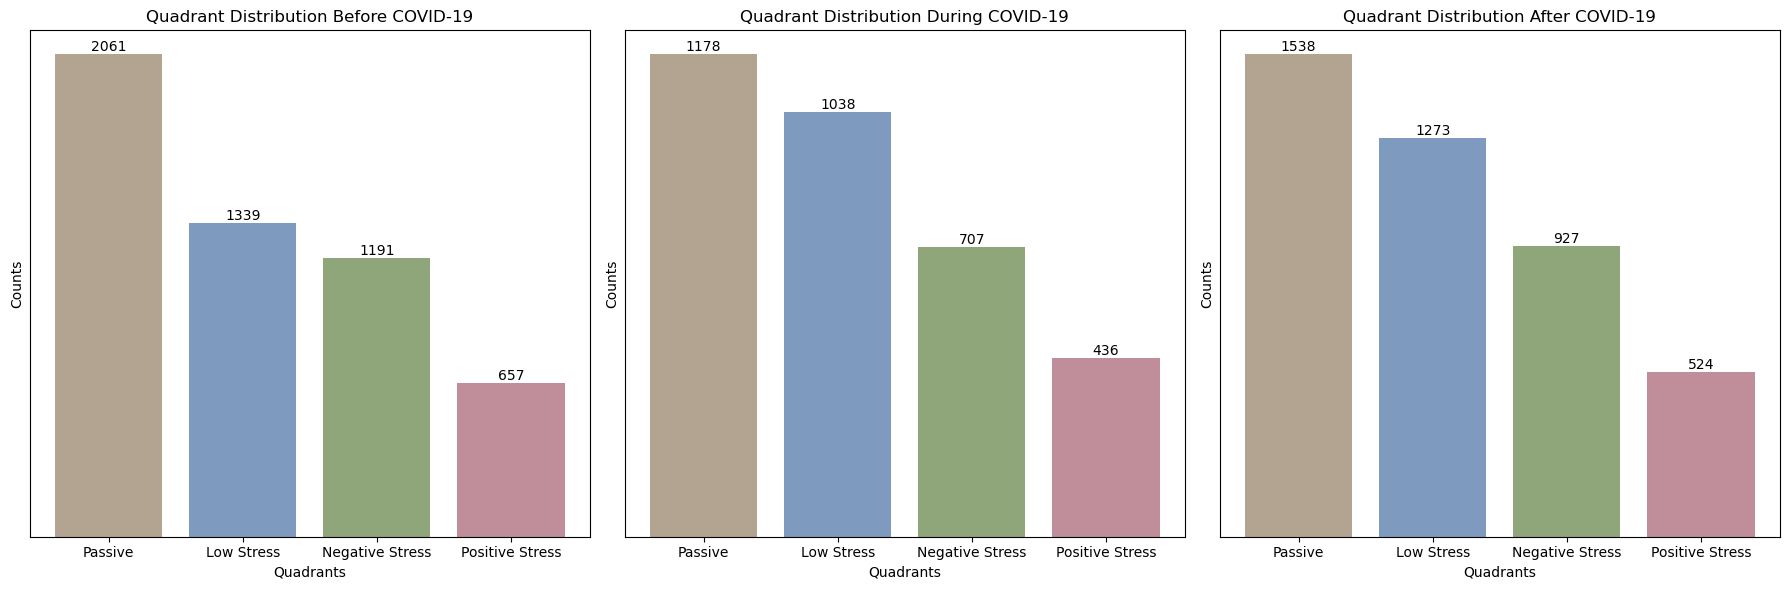

In [20]:
# Define colors for each quadrant.
colors = ["#b3a391", "#7e9abf", "#8fa67b", "#bf8e9a"]

# Define titles for each time period.
titles = [
    "Quadrant Distribution Before COVID-19", 
    "Quadrant Distribution During COVID-19", 
    "Quadrant Distribution After COVID-19"
]

# Define the timeframes corresponding to the titles.
timeframes = ["before", "during", "after"]

# Create a single figure with three subplots side by side.
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Iterate over each timeframe to populate the subplots.
for i, timeframe in enumerate(timeframes):
    # Get quadrant labels and their respective values for the current timeframe.
    labels = df_counts.index
    values = df_counts[timeframe]
    
    # Plot the data for the current timeframe using specified colors.
    axs[i].bar(labels, values, color=colors)
    
    # Set the title, x-axis label, and y-axis label for the current subplot.
    axs[i].set_title(titles[i])
    axs[i].set_xlabel("Quadrants")
    axs[i].set_ylabel("Counts")
    
    # Add data labels to each bar in the current subplot.
    data_labels(labels, values, axs[i])
    
    # Hide the y-axis ticks for a cleaner look.
    axs[i].set_yticks([])

# Ensure there's no overlap between subplots and everything fits well.
plt.tight_layout()
plt.show()

#### 4.3.

In [21]:
def safe_convert(date_str):
    try:
        return pd.to_datetime(date_str)
    except:
        return pd.NaT

companies["founded_on"] = companies["founded_on"].apply(safe_convert)

In [22]:
# Determine if company is a startup
current_year = pd.Timestamp.now().year
companies["is_startup"] = companies["founded_on"].dt.year > (current_year - 10)

In [23]:
companies["is_startup"].value_counts()

False    6606
True      403
Name: is_startup, dtype: int64

In [24]:
stress.columns

Index(['company_name', 'company_id', 'average_rating_before', 'zrating_before',
       'stress_before', 'zstress_before', 'association_before',
       'quadrant_before', 'average_rating_during', 'zrating_during',
       'stress_during', 'zstress_during', 'association_during',
       'quadrant_during', 'average_rating_after', 'zrating_after',
       'stress_after', 'zstress_after', 'association_after', 'quadrant_after'],
      dtype='object')

In [25]:
merged = stress.merge(right=companies[["id", "is_startup"]], left_on="company_id", right_on="id")

In [26]:
merged["is_startup"].value_counts()

False    4964
True      286
Name: is_startup, dtype: int64

In [27]:
# Assuming you have a DataFrame called 'merged'
# Calculate average stress for startups and non-startups
avg_stress = merged.groupby("is_startup")[["stress_before", "stress_during", "stress_after"]].mean()
avg_stress.head()

,stress_before,stress_during,stress_after
is_startup,,,
False,0.010451,0.013682,0.011087
True,0.015405,0.020254,0.013305


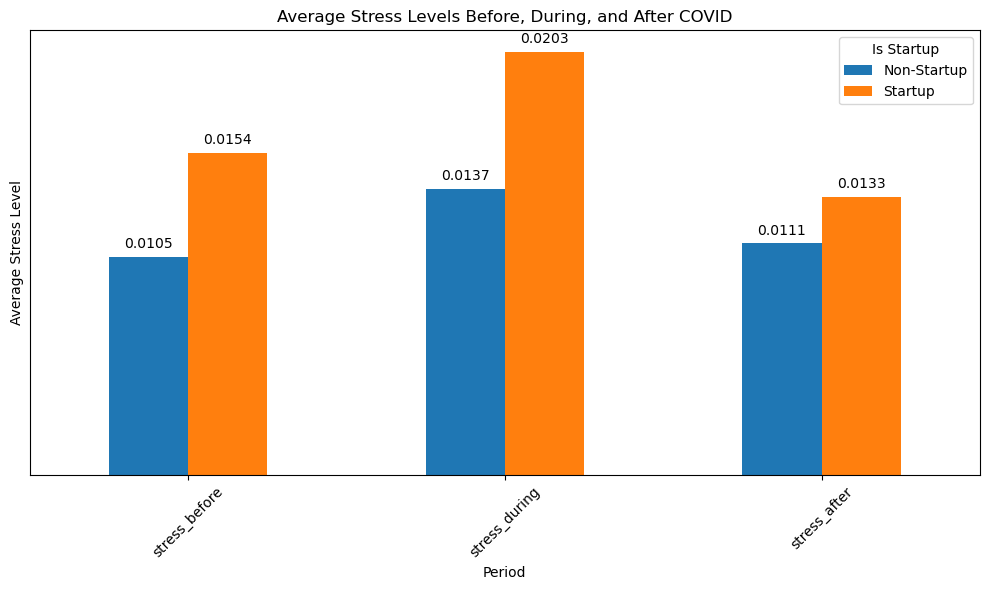

In [28]:
# Plotting
ax = avg_stress.T.plot(kind='bar', figsize=(10, 6))
plt.title("Average Stress Levels Before, During, and After COVID")
plt.ylabel("Average Stress Level")
plt.xlabel("Period")
plt.yticks([])
plt.xticks(rotation=45)
plt.legend(title="Is Startup", labels=['Non-Startup', 'Startup'])
plt.tight_layout()

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

In [35]:
start_up = merged[merged["is_startup"] == True][["stress_before", "stress_during"]].dropna()
start_up["diff"] = start_up["stress_before"] - start_up["stress_during"]

In [36]:
start_up.shape

(68, 3)

In [37]:
no_start_up = merged[merged["is_startup"] == False][["stress_before", "stress_during"]].dropna()
no_start_up["diff"] = no_start_up["stress_before"] - no_start_up["stress_during"]

In [38]:
no_start_up.shape

(1826, 3)

In [33]:
from scipy import stats

In [34]:
# Assuming start_up and no_start_up are your dataframes and "diff" is the column with the stress level differences
t_stat, p_value = stats.ttest_ind(start_up["diff"], no_start_up["diff"], equal_var=False)

# Print results
print(f't-statistic: {t_stat:.2f}')
print(f'p-value: {p_value:.5f}')

# Decide whether to reject the null hypothesis
alpha = 0.05  # commonly used significance level
decision = 'Reject' if p_value < alpha else 'Fail to reject'
print(f'{decision} the null hypothesis: there {"is" if p_value < alpha else "is no"} significant difference between the two groups.')

t-statistic: 0.25
p-value: 0.80169
Fail to reject the null hypothesis: there is no significant difference between the two groups.


In [41]:
merged.columns

Index(['company_name', 'company_id', 'average_rating_before', 'zrating_before',
       'stress_before', 'zstress_before', 'association_before',
       'quadrant_before', 'average_rating_during', 'zrating_during',
       'stress_during', 'zstress_during', 'association_during',
       'quadrant_during', 'average_rating_after', 'zrating_after',
       'stress_after', 'zstress_after', 'association_after', 'quadrant_after',
       'id', 'is_startup'],
      dtype='object')

In [42]:
companies.columns

Index(['id', 'revenue', 'type_x', 'yearFounded', 'industryName', 'rank',
       'roles', 'country_code', 'status', 'num_funding_rounds',
       'total_funding_usd', 'total_funding', 'total_funding_currency_code',
       'founded_on', 'last_funding_on', 'employee_count', 'primary_role',
       'is_startup'],
      dtype='object')

In [43]:
companies.head().T

,0,1,2,3,4
id,6036,2763,194,432,4138
revenue,$10+ billion (USD),$10+ billion (USD),$10+ billion (USD),$10+ billion (USD),$10+ billion (USD)
type_x,Company - Public,Company - Private,Company - Public,Company - Public,Company - Public
yearFounded,1994.0,1850.0,1962.0,1955.0,1989.0
industryName,Internet & Web Services,Accounting & Tax,General Merchandise & Superstores,Restaurants & Cafes,Business Consulting
rank,18.0,7338.0,9578.0,81595.0,456.0
roles,"investor,company","investor,company","investor,company","investor,company","investor,company"
country_code,USA,GBR,USA,USA,IRL
status,ipo,operating,ipo,ipo,ipo
num_funding_rounds,3.0,NaN,1.0,NaN,1.0


In [44]:
companies["revenue"].value_counts()

Unknown / Non-Applicable            1975
$100 to $500 million (USD)          1395
$1 to $5 billion (USD)              1101
$25 to $100 million (USD)            647
$500 million to $1 billion (USD)     600
$10+ billion (USD)                   559
$5 to $10 billion (USD)              324
$5 to $25 million (USD)              234
$1 to $5 million (USD)                95
Less than $1 million (USD)            65
Name: revenue, dtype: int64

In [45]:
companies["rank"]

18.0        1
3948.0      1
238083.0    1
488690.0    1
252543.0    1
           ..
235190.0    1
49535.0     1
13071.0     1
6394.0      1
205678.0    1
Name: rank, Length: 7008, dtype: int64

In [47]:
merged_df = stress.merge(right=companies, left_on="company_id", right_on="id")
merged_df.shape

(5250, 38)

In [48]:
stress.shape

(7057, 20)

In [49]:
companies.shape

(7009, 18)

### Rank

In [ ]:
merged